# Twitter Sentiment Analysis

### 1. Import Libraries

Import all the libraries to be used in this notebook. We load the initial libraries at the beginning and keep on adding more libraries as we go along on the project

In [443]:
# Import Libraries

import tweepy # for tweet mining
from textblob import TextBlob # TextBlob - Python library for processing textual data
from wordcloud import WordCloud # WordCloud - Python library for creating image wordclouds
from nltk.sentiment.vader import SentimentIntensityAnalyzer #  lexicon and rule-based sentiment analysis tool
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations.
import re # In-built regular expressions library
import os # to access environment from the operating system 
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import matplotlib.pyplot as plt  # for plotting
plt.style.use('fivethirtyeight')
%matplotlib inline

In [270]:
from dotenv import load_dotenv  # loading the  environment 


In [271]:
# Loading Environment from the operating system
load_dotenv()

True

In [571]:
# Natural Language Processing Toolkit
import nltk
import spacy
# Tokenize - large quantity of text is divided into smaller parts 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk import pos_tag # For Parts of Speech tagging
from collections import Counter
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### 2. Tweets Mining

We are using the Tweepy library for Python to scrape tweets. We created a developer account with Twitter to get the keys used below for this task.

In [89]:
# Get the API keys from env
consumer_key = os.getenv("TWITTER_API_KEY")
consumer_secret_key = os.getenv("TWITTER_API_SECRET_KEY")
access_token = os.getenv("TWITTER_ACCESS_TOKEN")
access_token_secret = os.getenv("TWITTER_ACCESS_TOKEN_SECRET")

# Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
# checking the API keys validate or not

In [99]:
#type(consumer_key)

In [100]:
#type(consumer_secret_key)

In [102]:
#type(access_token)

In [103]:
#type(access_token_secret)

#### User-defined Functions for Tweets Mining

We created a functions for searching with different phrases, Example "EV Stock", "Best EV Stock", "EV Stock Future", "Top EV Maker". We do  different searches and each result store in a csv file. This is because we can be consistant with the data as we work along. 

In [219]:
def write_df_to_csv(df, file_name):
    df.to_csv(file_name, index=False)

In [465]:
def getTweets():
    keyword = input("Please enter keyword or hashtag to search: ")
    noOfTweet = int(input ("Number of tweets to analyze: "))
    tweet_list = []
    # Collect tweets using the Cursor object
    tweets = tweepy.Cursor(api.search, 
                           q=keyword, 
                           keyword = keyword + "  -filter:links AND -filter:retweets AND -filter:replies", 
                          lang="en",
                          tweet_mode='extended' ).items(noOfTweet)
     # Each item in the iterator has various attributes that you can access to get information about each tweet
    for tweet in tweets:
        tweet_list.append([
            tweet.id,
            tweet.created_at,
            tweet.full_text,
            tweet.user.location,
            tweet.retweet_count,
            tweet.favorite_count
        ])
    return tweet_list

In [472]:
tweet_list = getTweets()

Please enter keyword or hashtag to search: Top EV Maker
Number of tweets to analyze: 2000


In [473]:
tweet_list_df = pd.DataFrame(tweet_list,columns=["Id","Date", "Tweets","Location","Retweets","Favorite"])
tweet_list_df.head()

,Id,Date,Tweets,Location,Retweets,Favorite
0,1420544025631760384,2021-07-29 00:37:42,@ev_truths @alex_avoigt I think EV technology ...,"Seattle, WA",0,0
1,1420519469865177088,2021-07-28 23:00:08,Compact International(1994) Wants to be Top EV...,U.S.A,0,0
2,1419726996104486919,2021-07-26 18:31:07,RT @cliffski: Toyota are not much better than ...,"Louisville, KY",2,0
3,1419703662092472320,2021-07-26 16:58:24,Toyota are not much better than volkswagen. Th...,None of your business,2,4
4,1419665554038681606,2021-07-26 14:26:58,GM China’s Venture Has Big Ambitions Beyond $4...,Vancouver and London,0,0


In [480]:
tweet_list_df.shape

(29, 6)

In [475]:
write_df_to_csv(tweet_list_df,"Top_EV_Maker_tweet.csv")

In [412]:
stock_tweet = pd.read_csv("EV_Stock_tweet.csv")

In [413]:
best_tweet = pd.read_csv("Best_EV_Stock_tweet.csv")

In [471]:
future_tweet = pd.read_csv("Future_EV_Stock_tweet.csv")

In [476]:
top_tweet =  pd.read_csv("Top_EV_Maker_tweet.csv")

In [253]:
company_tweet =  pd.read_csv("EV_Company_tweet.csv")

In [254]:
#stock_tweet.shape

In [255]:
#pwd

#### Combining all Tweets into single Pandas Dataframe

In [481]:
path = "/Users/syedahasan/Desktop/EV_Sentiment_Trading"
all_files = glob.glob(path + "/*.csv")
#all_files

In [482]:
tweets = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0) # Convert each csv to a dataframe
    tweets.append(df)

tweets_df = pd.concat(tweets, axis=0, ignore_index=True) # Merge all dataframes

tweets_df.head()

,Id,Date,Tweets,Location,Retweets,Favorite
0,1420544025631760384,2021-07-29 00:37:42,@ev_truths @alex_avoigt I think EV technology ...,"Seattle, WA",0,0
1,1420519469865177088,2021-07-28 23:00:08,Compact International(1994) Wants to be Top EV...,U.S.A,0,0
2,1419726996104486919,2021-07-26 18:31:07,RT @cliffski: Toyota are not much better than ...,"Louisville, KY",2,0
3,1419703662092472320,2021-07-26 16:58:24,Toyota are not much better than volkswagen. Th...,None of your business,2,4
4,1419665554038681606,2021-07-26 14:26:58,GM China’s Venture Has Big Ambitions Beyond $4...,Vancouver and London,0,0


### 3. Data Cleaning

The dataframe that is created on above, will be cleaned in this section. We are going to search for any duplication and will remove it. It is also important to mention that the Tweet ID was considered as the Primary key for all the dataframe. We are also going to replace the "NaN" values in Location column.

In [483]:
#Get number of rows and columns
tweets_df.shape 

(3559, 6)

In [484]:
tweets_df.duplicated(subset='Tweets').sum() # Check for duplicate values

1169

In [485]:
# drop duplicate values
tweets_df=tweets_df.drop_duplicates(subset=['Tweets']) 

In [486]:
# Check the shape after dropping duplicates
tweets_df.shape 

(2390, 6)

In [487]:
# Check for "NaN" values
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location     True
Retweets    False
Favorite    False
dtype: bool

In [488]:
# Replace "NaN" values with "No Location"
tweets_df['Location']=tweets_df['Location'].fillna('No location') 

In [489]:
# Check for "NaN" values again
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location    False
Retweets    False
Favorite    False
dtype: bool

### 4. Processing

The Individual Tweer needed to be cleaned. We are using several functions to clean the tweet and to show the words used. We are extracting only the adjectives to a new column to view the weight.

In [527]:
# NLTK list of stopwords
from nltk.corpus import stopwords

In [528]:
# Lemmatization is a technique that transforms various morphologies of a word into its base form. 
from nltk.stem import WordNetLemmatizer 
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [564]:
def clean_tweet(text):
    text = text.lower()  #has to be in place
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove # symbol
    text = re.sub(r'$', '', text)  # Remove $ symbol
    text = re.sub(r'RT[\s]+','', text) # Remove RT
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove urls
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
    text = re.sub(r':','', text)
    sw = set(stopwords.words('english'))
    sw_addons = {'do', 'of', '$','r', '*,*','-',', ','``','\'s','.','-','public','rt''company', 'instead','&','’', 'in', 'they','\'your', 'what', 'also'}
    words = word_tokenize(text)
    output = [x.lower() for x in words if x.lower() not in sw.union(sw_addons)]
    # Remove punctuations
    unpunctuated_words = [char for char in output if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them

In [565]:
tweets_df['Processed_Tweets'] = tweets_df['Tweets'].apply(clean_tweet)

In [601]:
# Helper functions
def all_noun(tweet):
    """
    This function retrieves all the adjectives on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        adjs (list): A list with all the adjectives in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "NN"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [620]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
tweets_df['Tweets_Nouns'] = tweets_df['Processed_Tweets'].apply(all_noun)

In [610]:
def get_word_counts(t, w):
    """
    This function counts the occurrences of a word in a text.
    
    Args:
        text (string): The text where word counts will be analyzed.
        word (string): The word to look into the text.
        
    Returns:
        word_count (int): The counts of the word in the given text.
    """
    
    # Use the word_tokenize module from NLTK to tokenize the text
    tok = word_tokenize(t)
    
    # Create a list with all the tokens retrieved from the text
    tok = [w.lower() for w in tok]
    
    # Count the occurrences of the word in the text
    word_count = tok.count(w)
    
    return word_count

In [611]:
# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [612]:

# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Processed_Tweets'
tweets_df['Tweets_Sentiments'] = tweets_df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [621]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Tweets_Nouns'].tolist()
tweets_long_string = " ".join(tweets_long_string)

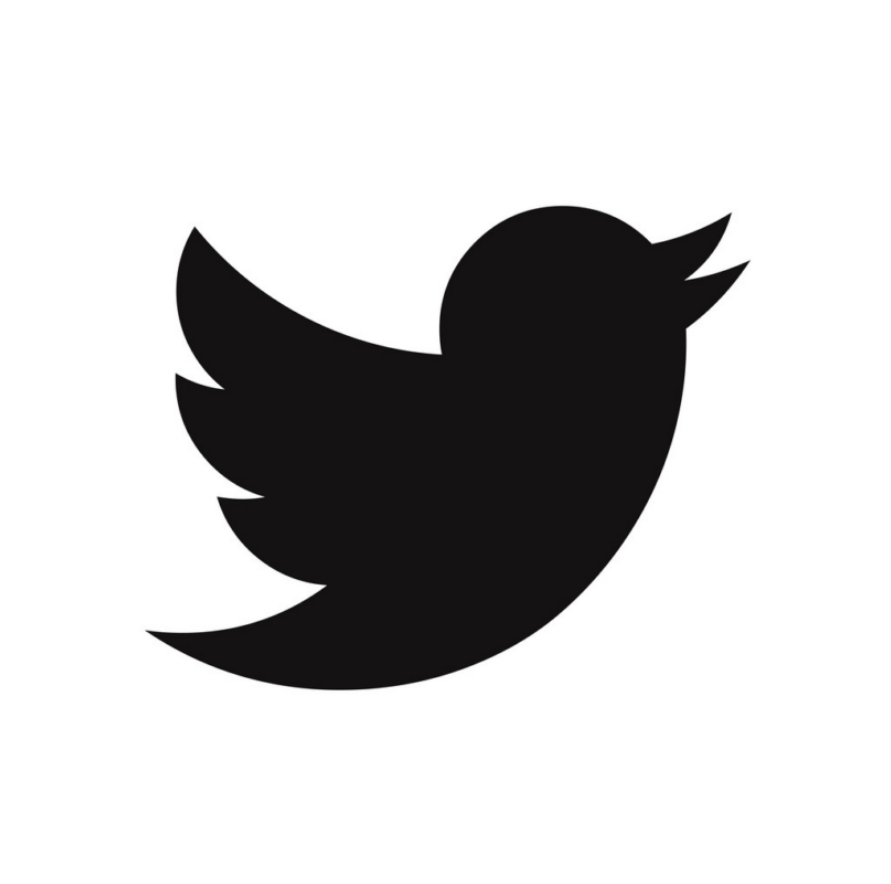

In [622]:
from PIL import Image # for opening, manipulating, and saving many different image file 
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [623]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

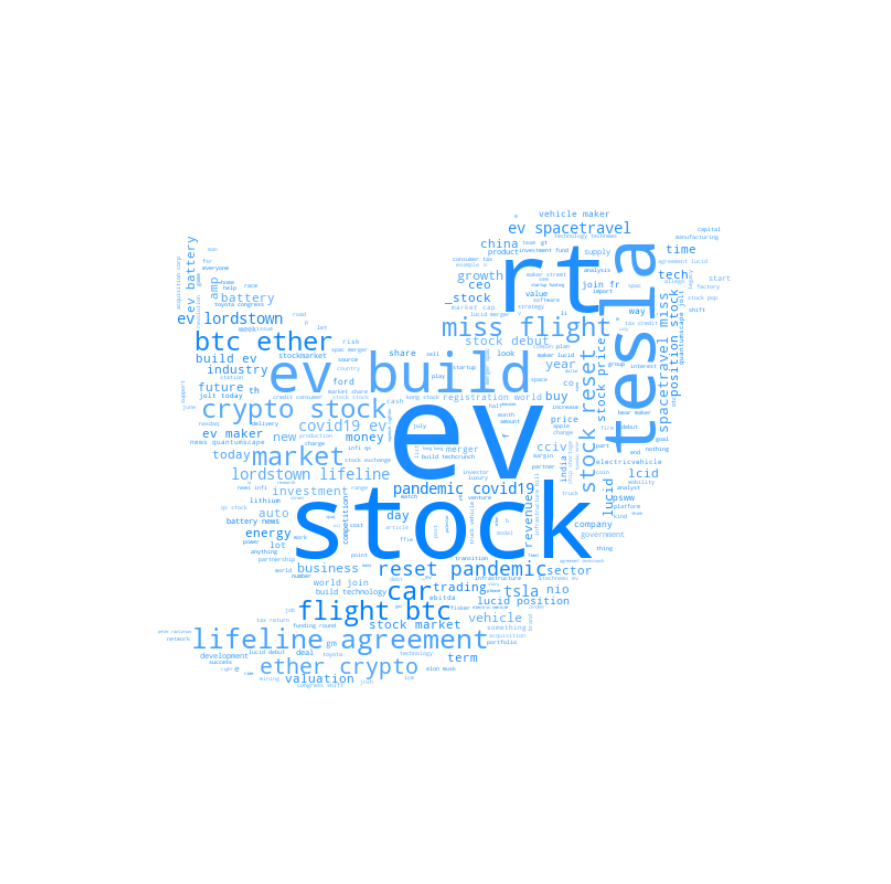

In [624]:
import random # generating random numbers
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [625]:
# Combine all words into a list
tweets_long_string = tweets_df['Tweets_Nouns'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [626]:
# Use the Built-in Python Collections module to determine Word frequency
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)
df.head()

,Words,Count
4,ev,917
22,stock,739
21,rt,350
19,tesla,178
47,market,129


In [619]:
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/syedahasan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [495]:
# Creating the CountVectorizer instance defining the stopwords in English to be ignored
vectorizer = CountVectorizer(stop_words="english")

# Getting the tokenization and occurrence counting
X = vectorizer.fit_transform([tweets_df['Processed_Tweets']])

# Retrieve unique words list
words = vectorizer.get_feature_names()
print(words)

AttributeError: 'Series' object has no attribute 'lower'

In [68]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)
    
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Number of tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword, keyword = keyword + " -filter:retweets", lang="en", ).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



# Sentiment Analysis
for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
 
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
        
# Set the sentiment variables as sentiment of tweet  
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: EV Stock
Number of tweets to analyze: 50


In [69]:
tweet_list = pd.DataFrame(tweet_list)
tweet_list

,0
0,Proterra (PTRA) Stock || BIG News + Price Pred...
1,@JoeHomsy 40% reduction of transportation GHG ...
2,"RT @unseenvalue: Trollers : "" It's 'your' faul..."
3,QuantumScape Jumps As Solid-State EV Battery D...
4,Tesla Vs. Nio: Which EV Stock Has Performed Be...
5,Lucid Motors CEO says EV start-up is in an 'en...
6,RT @KevinBCook: EV Trucks: Will They Fly? - Ju...
7,$JNSH \nEV charging infrastructure otc stock h...
8,Lucid Goes Public. It’s the Fourth Most Valuab...
9,Tesla Vs. Nio: Which EV Stock Has Performed Be...


In [70]:
tweet_list.columns = ["Tweets"]

In [72]:
tweet_list['Tweets'] = tweet_list['Tweets'].apply(clean_tweet)

In [73]:
tweet_list["Tweets"][3]

'QuantumScape Jumps As Solid-State EV Battery Development Ramps\xa0Up '

In [74]:
tweet_list

,Tweets
0,Proterra (PTRA) Stock || BIG News + Price Pred...
1,"40% reduction of transportation GHG (trucks, ..."
2,"Trollers "" It's 'your' fault that 'I' did no..."
3,QuantumScape Jumps As Solid-State EV Battery D...
4,Tesla Vs. Nio Which EV Stock Has Performed Bet...
5,Lucid Motors CEO says EV start-up is in an 'en...
6,"EV Trucks Will They Fly? - July 28, 2021 - $F..."
7,$JNSH \nEV charging infrastructure otc stock
8,Lucid Goes Public. It’s the Fourth Most Valuab...
9,Tesla Vs. Nio Which EV Stock Has Performed Bet...


In [35]:
import emoji
import spacy
import stop_words

nlp = spacy.load('en_core_web_sm')

stopwords = [w.lower() for w in stop_words.get_stop_words('en')]

emoticon_string = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth      
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
    )"""

def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)

def sanitize(text):
    """ Sanitize one string """

    # remove graphical emoji
    string = give_emoji_free_text(string) 

    
    return text

In [37]:
tweet_list['Tweets'] = sanitize(tweet_list['Tweets'])

TypeError: expected string or bytes-like object

In [22]:
# combine all tweets into one list
for i in list(tweet_list): 
    text = tweet_list[i].tolist()

In [23]:
# combine into one string
text = ' '.join(text)

In [24]:
# # combine into one string
# text_string = ''
# for x in text:
#     text_string += ' ' + x

In [25]:
# Sentence Tokenization
tokenized_text=sent_tokenize(text)
print(tokenized_text)

[' Roads.', 'Bridges.', 'Rail.', 'Broadband.', 'Removing Lead Water Pipes.', 'EV Charging Stations.', 'Mass Transit.', 'Some of the largest inv… _Ev  I Iove him!!', "Karnataka account for 21% of India's EV market  Check out T, MN, ARNP, CCRN-K, AGNP-C's video!", 'TikTok  Alset EHome International Inc. will Deliver First 20 EHomes with Tesla PV Solar Panels, Powerwalls and EV Chargers…   ⚡ An EV future \n\nThe future of cars is electric, and we’re ready to invest $7.5 billion toward a network of EV chargers…  Love it!', "There isn't much that beats DrivingOnSunshine EV KickGas  daring  Roads.", 'Bridges.', 'Rail.', 'Broadband.', 'Removing Lead Water Pipes.', 'EV Charging Stations.', 'Mass Transit.', 'Some of the largest inv…  The little mermaid… but it’s Kuko 🐉🐠💜!', 'Austin Riley - Flyout vs Tylor Megill\nBraves vs Mets\n\nEV   96.8 (MPH)\nLA   56 (Deg.)', 'Dist 237 (ft.)\nxBA  Not…  EV did all the footwork.', 'I just spent my money  Soo Cool.', 'Showed me "Toy-Makers...', 'etc."', 'Now

In [26]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Roads', '.', 'Bridges', '.', 'Rail', '.', 'Broadband', '.', 'Removing', 'Lead', 'Water', 'Pipes', '.', 'EV', 'Charging', 'Stations', '.', 'Mass', 'Transit', '.', 'Some', 'of', 'the', 'largest', 'inv…', '_Ev', 'I', 'Iove', 'him', '!', '!', 'Karnataka', 'account', 'for', '21', '%', 'of', 'India', "'s", 'EV', 'market', 'Check', 'out', 'T', ',', 'MN', ',', 'ARNP', ',', 'CCRN-K', ',', 'AGNP-C', "'s", 'video', '!', 'TikTok', 'Alset', 'EHome', 'International', 'Inc.', 'will', 'Deliver', 'First', '20', 'EHomes', 'with', 'Tesla', 'PV', 'Solar', 'Panels', ',', 'Powerwalls', 'and', 'EV', 'Chargers…', '⚡', 'An', 'EV', 'future', 'The', 'future', 'of', 'cars', 'is', 'electric', ',', 'and', 'we', '’', 're', 'ready', 'to', 'invest', '$', '7.5', 'billion', 'toward', 'a', 'network', 'of', 'EV', 'chargers…', 'Love', 'it', '!', 'There', 'is', "n't", 'much', 'that', 'beats', 'DrivingOnSunshine', 'EV', 'KickGas', 'daring', 'Roads', '.', 'Bridges', '.', 'Rail', '.', 'Broadband', '.', 'Removing', 'Lead', 'W

In [27]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 5549 samples and 39369 outcomes>


In [28]:
fdist.most_common(10)

[('.', 3802),
 ('EV', 1129),
 ('the', 1086),
 ('of', 777),
 (',', 714),
 ('to', 564),
 ('Charging', 458),
 ('Stations', 451),
 ('Roads', 450),
 ('Bridges', 450)]

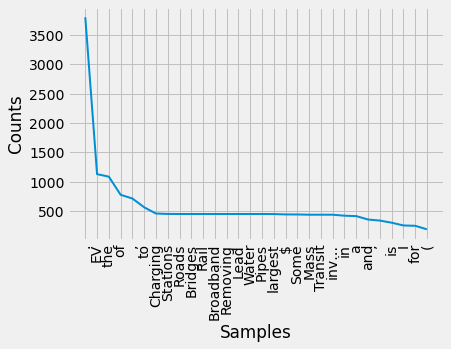

In [29]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [30]:
# Stopwords- considered as noise in the text.

In [31]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'weren', 'him', 've', 'yourselves', 'ours', 'does', 'hadn', 'should', 'nor', 'them', 'between', 'that', 't', 'once', 'into', 'other', 'm', 'against', 'haven', 'few', 'up', "hasn't", 'himself', 'with', 'their', 'too', 'for', 'doing', 'and', 'am', 'been', 'some', 'hasn', 'themselves', 'what', "weren't", "mustn't", 'before', "doesn't", "you've", 'over', 'out', 'your', 'its', 'because', 'how', "should've", 'have', "wasn't", 'can', "aren't", 'yours', "needn't", 'own', 'was', 'couldn', 'but', 'theirs', "haven't", "hadn't", 'me', "mightn't", 'will', 'than', 'all', 'after', 'while', 'his', 'shan', 'don', 'having', 'under', 'not', 'most', 'you', 'where', 'they', 'were', 'on', 'then', 'o', "won't", 'why', 'each', 'down', 'herself', 'off', 'is', 'any', 'very', 'we', 'i', "shan't", 'by', 'ma', 'yourself', 'if', 'same', 'she', 'did', 'until', 'above', 'this', 'below', 'so', 'such', "you'd", "she's", 'an', "you'll", 'these', 'be', "you're", 'further', 'our', 'those', 'ain', 'at', 'now', "shouldn't"

In [32]:
# Removing Stopwords
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Roads', '.', 'Bridges', '.', 'Rail', '.', 'Broadband', '.', 'Removing', 'Lead', 'Water', 'Pipes', '.', 'EV', 'Charging', 'Stations', '.', 'Mass', 'Transit', '.', 'Some', 'of', 'the', 'largest', 'inv…', '_Ev', 'I', 'Iove', 'him', '!', '!', 'Karnataka', 'account', 'for', '21', '%', 'of', 'India', "'s", 'EV', 'market', 'Check', 'out', 'T', ',', 'MN', ',', 'ARNP', ',', 'CCRN-K', ',', 'AGNP-C', "'s", 'video', '!', 'TikTok', 'Alset', 'EHome', 'International', 'Inc.', 'will', 'Deliver', 'First', '20', 'EHomes', 'with', 'Tesla', 'PV', 'Solar', 'Panels', ',', 'Powerwalls', 'and', 'EV', 'Chargers…', '⚡', 'An', 'EV', 'future', 'The', 'future', 'of', 'cars', 'is', 'electric', ',', 'and', 'we', '’', 're', 'ready', 'to', 'invest', '$', '7.5', 'billion', 'toward', 'a', 'network', 'of', 'EV', 'chargers…', 'Love', 'it', '!', 'There', 'is', "n't", 'much', 'that', 'beats', 'DrivingOnSunshine', 'EV', 'KickGas', 'daring', 'Roads', '.', 'Bridges', '.', 'Rail', '.', 'Broadband', '.', 'R

In [40]:
# Stemming - reduces words to their word root word

In [41]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Roads', '.', 'Bridges', '.', 'Rail', '.', 'Broadband', '.', 'Removing', 'Lead', 'Water', 'Pipes', '.', 'EV', 'Charging', 'Stations', '.', 'Mass', 'Transit', '.', 'Some', 'largest', 'inv…', 'FDP', '’', 'generate', 'real', 'cash', 'terrible', 'ROIC', '.', 'Using', 'PF', 'FCF', 'Dole', ',', 'CROIC', '10', '%', '-11', '%', 'vs…', 'Roads', '.', 'Bridges', '.', 'Rail', '.', 'Broadband', '.', 'Removing', 'Lead', 'Water', 'Pipes', '.', 'EV', 'Charging', 'Stations', '.', 'Mass', 'Transit', '.', 'Some', 'largest', 'inv…', '_Flawed_King', 'I', '’', 'take', 'Ev', 'Southern', 'Comfort', 'kitchen', 'tell', 'season', 'food', 'No', 'primate', 'wants', 'EV', '!', 'Museveni', 'invested', '40bn', 'kiira', 'Ev', '.', 'With', 'flagship', 'prototype', 'kayoola', 'Ev', '.', 'This', 'week', 'launched', 'awarded', 'Chin…', 'It', 'looks', 'like', 'EV', '’', 'got', 'hit', 'hard', 'bipartisan', 'infrastructure', 'bill', '.', '$', 'TSLA', '.', 'files', 'trademark', 'six', 'new', 'EV', 'pickup'

In [42]:
#Lemmatization - reduces words to their base word

In [43]:
# from nltk.stem.wordnet import WordNetLemmatizer
# lem = WordNetLemmatizer()

# from nltk.stem.porter import PorterStemmer
# stem = PorterStemmer()

# word = "flying"
# print("Lemmatized Word:",lem.lemmatize(word,"v"))
# print("Stemmed Word:",stem.stem(word))

In [44]:
# Sentiment analysis

In [45]:
text.Sentiment.value_counts()

AttributeError: 'str' object has no attribute 'Sentiment'